In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random

%matplotlib inline

/usr/local/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
def convert_runtime_file_to_dict(fp):
    mapping = {}
    with open(fp, 'r') as f:
        for line in f.readlines():
            arr = line.strip().split("#####")
            k = arr[0]
            v = json.loads(arr[1])[0]['Execution Time'] / 1000
            mapping[k] = v
    return mapping

def sum_runtime_file(fp):
    with open(fp, 'r') as f:
        return sum([json.loads(line.split("#####")[1].strip())[0]['Execution Time'] / 1000 for line in f.readlines()])
    
def get_accumulation_list(query_dict, query_id_list):
    result = []
    
    for qid in query_id_list:
        cur_acc_time = query_dict[qid] + (0 if len(result) == 0 else result[-1])
        result.append(cur_acc_time)
    return result

# Performance on training set

In [4]:
pg_run_time_dict = convert_runtime_file_to_dict("pg_tpch_train.log")
lero_run_time_dict = convert_runtime_file_to_dict("lero_tpch.log")

with open("pg_tpch_train.log", 'r') as f:
    query_keys = [line.strip().split("#####")[0] for line in f.readlines()]
    
pg_run_time_train = get_accumulation_list(pg_run_time_dict, query_keys)
lero_run_time_train = get_accumulation_list(lero_run_time_dict, query_keys)

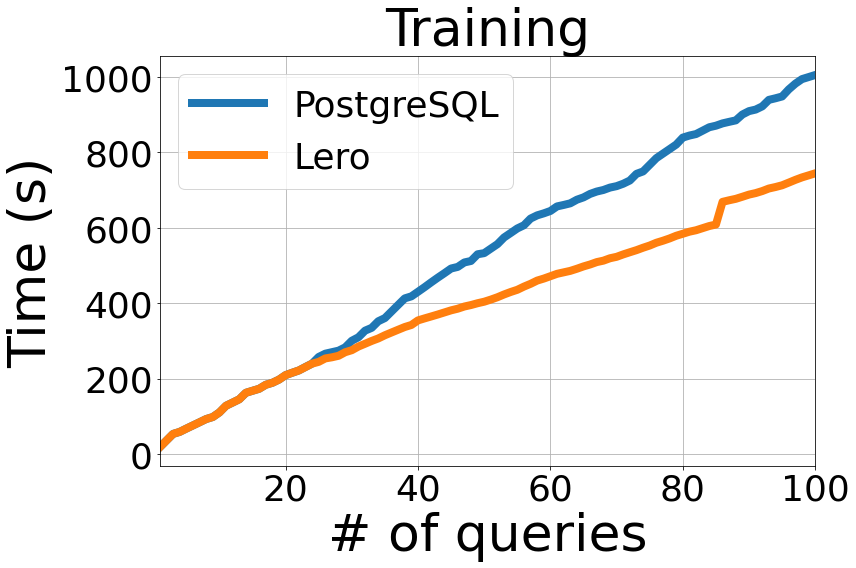

In [5]:
x = range(1, len(pg_run_time_train)+1)
plt.figure(figsize=(12, 8))

plt.plot(x, pg_run_time_train, label="PostgreSQL", linewidth=8)
plt.plot(x, lero_run_time_train, label="Lero", linewidth=8)

plt.ylabel("Time (s)", fontsize=52)
plt.xlim(1, 100)
plt.xticks(size=36)
plt.yticks(size=36)
plt.xlabel("# of queries", fontsize=52)
plt.title("Training", fontsize=52)

plt.legend(fontsize=36)
plt.grid()

plt.tight_layout()
plt.savefig("./train.jpg")

# Performance on test set

In [11]:
lero_run_time_test = []
for i in range(0, 5):
    lero_run_time_test.append(sum_runtime_file("lero_tpch.log_tpch_test_model_" + str(i)))

pg_run_time_test = [sum_runtime_file("pg_tpch_test.log")] * 5

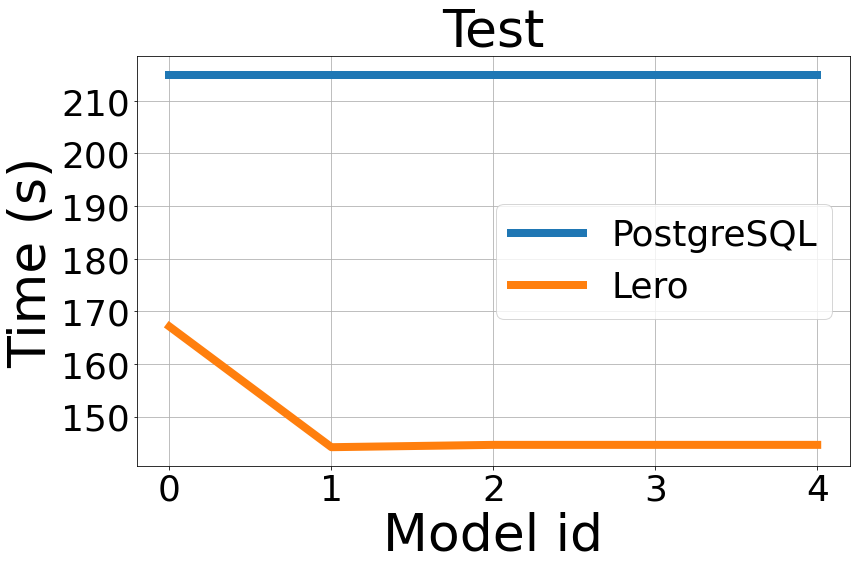

In [12]:
x = range(len(pg_run_time_test))
plt.figure(figsize=(12, 8))

plt.plot(x, pg_run_time_test, label="PostgreSQL", linewidth=8)
plt.plot(x, lero_run_time_test, label="Lero", linewidth=8)

plt.ylabel("Time (s)", fontsize=52)
plt.xlabel("Model id", fontsize=52)
plt.title("Test", fontsize=52)
plt.xticks([0, 1, 2, 3, 4], [0, 1, 2, 3, 4], size=36)
plt.yticks(size=36)
plt.legend(fontsize=36)
plt.grid()

plt.tight_layout()
plt.savefig("./test.jpg")